In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/Books.csv')
df.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20][circular reporting?],Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[21][22],"Fantasy, Children's fiction"
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[23][24],"Fantasy, Children's fiction"
3,And Then There Were None,Agatha Christie,English,1939,100 million[25],Mystery
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791,100 million[26][27],Family saga


### Mostrar informacion basica del df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Book               264 non-null    object
 1   Author(s)          264 non-null    object
 2   Original language  264 non-null    object
 3   First published    264 non-null    object
 4   Approximate sales  264 non-null    object
 5   Genre              264 non-null    object
dtypes: object(6)
memory usage: 12.5+ KB


### Describir df de manera estadistica

In [6]:
df.describe()

,Book,Author(s),Original language,First published,Approximate sales,Genre
count,264,264,264,264,264,264
unique,170,153,16,98,166,74
top,Tuesdays with Morrie,J. K. Rowling,English,1979,65 million[35],Erotica
freq,3,7,198,10,5,77


### Revisar si hay datos nulos

In [7]:
df.isnull()

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
259,False,False,False,False,False,False
260,False,False,False,False,False,False
261,False,False,False,False,False,False
262,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Book                 0
Author(s)            0
Original language    0
First published      0
Approximate sales    0
Genre                0
dtype: int64

### Distribucion generos

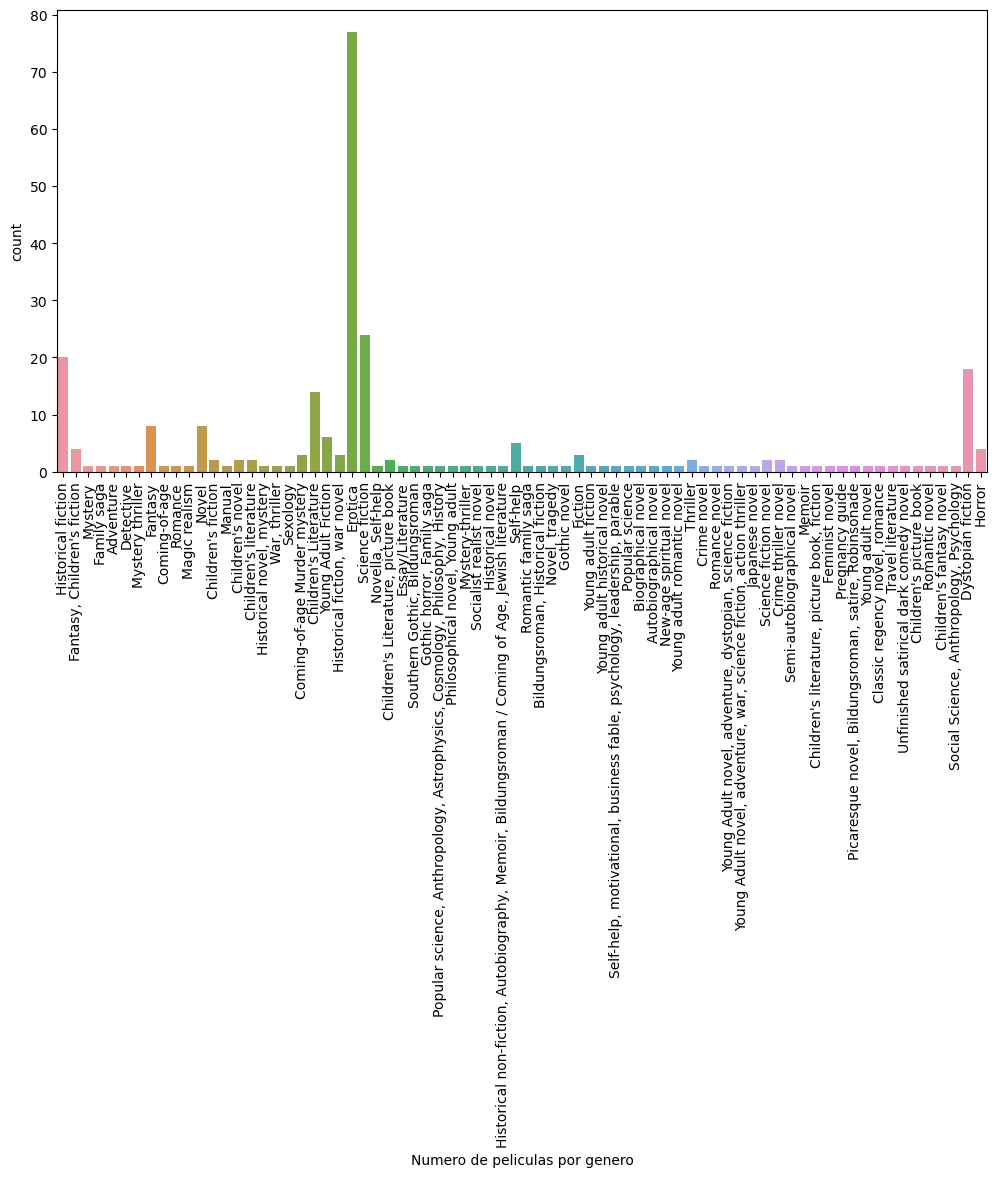

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='Genre', data=df)
## TODO: add plt title

plt.xlabel('Genero de peliculas')
plt.xlabel('Numero de peliculas por genero')

plt.xticks(rotation='vertical')
plt.show()

### Distribucion por lenguaje

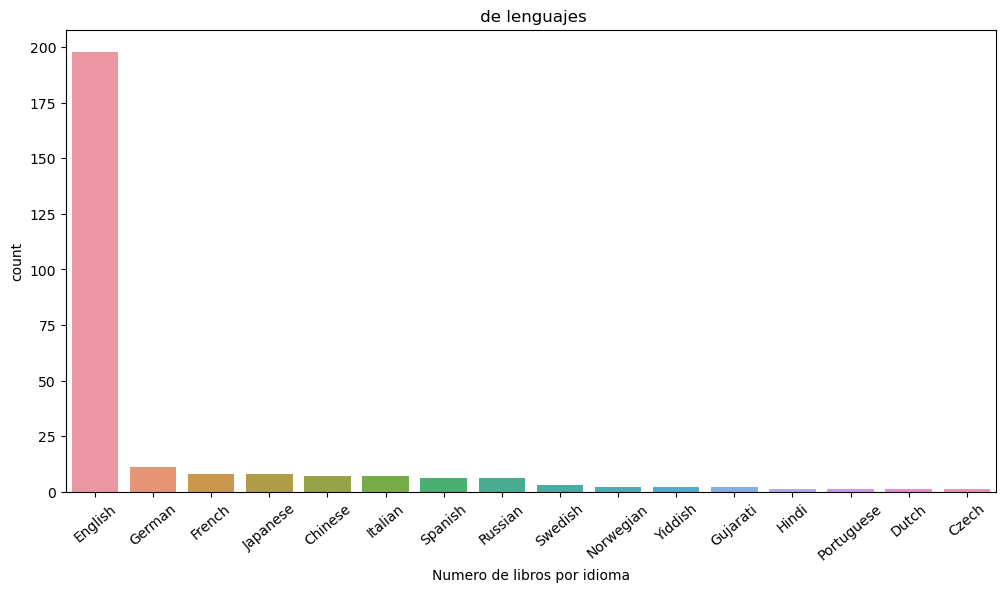

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='Original language',data=df, order=df['Original language'].value_counts().index)

plt.title(' de lenguajes')
plt.xlabel('Idioma de libros')
plt.xlabel('Numero de libros por idioma')

plt.xticks(rotation=40)
plt.show()

### Publicacion en el tiempo

In [11]:
#visualisar tipo de datos

df.dtypes

Book                 object
Author(s)            object
Original language    object
First published      object
Approximate sales    object
Genre                object
dtype: object

In [12]:
df['First published']=pd.to_datetime(df['First published'], errors='coerce')


In [13]:
df.dtypes

Book                         object
Author(s)                    object
Original language            object
First published      datetime64[ns]
Approximate sales            object
Genre                        object
dtype: object

In [14]:
df.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859-01-01,>200 million[20][circular reporting?],Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943-01-01,200 million[21][22],"Fantasy, Children's fiction"
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997-01-01,120 million[23][24],"Fantasy, Children's fiction"
3,And Then There Were None,Agatha Christie,English,1939-01-01,100 million[25],Mystery
4,Dream of the Red Chamber (???),Cao Xueqin,Chinese,1791-01-01,100 million[26][27],Family saga


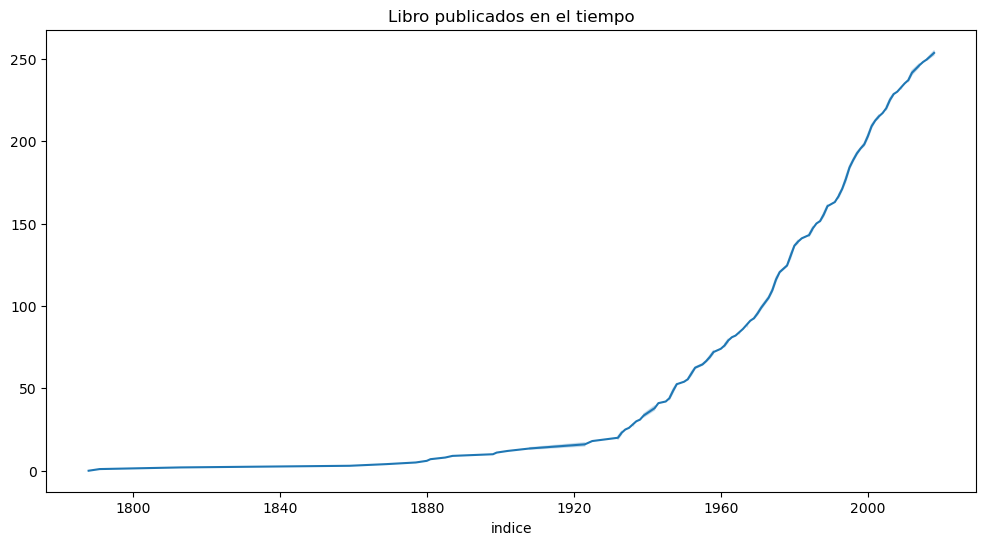

In [15]:
plt.figure(figsize=(12,6))

sns.lineplot(
x='First published',
y=df.index,
data=df.sort_values('First published')
)

plt.title('Libro publicados en el tiempo')
plt.xlabel('año')
plt.xlabel('indice')

plt.show()

### #

In [16]:
df.dtypes

Book                         object
Author(s)                    object
Original language            object
First published      datetime64[ns]
Approximate sales            object
Genre                        object
dtype: object

### Agrupar informacion por autor y año de publicacion

In [17]:
author_year_counts = df.groupby(
    ['Author(s)',df['First published'].dt.year]
).size().reset_index(name='Book count')

author_year_counts

,Author(s),First published,Book count
0,Agatha Christie,1939.0,1
1,Albert Camus,1942.0,2
2,Albert Camus,1947.0,2
3,Alex Comfort,1972.0,2
4,Alexander Alexandrovich Fadeyev,1945.0,1
...,...,...,...
160,William Peter Blatty,1971.0,2
161,Xaviera Hollander,1971.0,1
162,Xue Muqiao,1979.0,2
163,Yann Martel,2001.0,2


### Creacion de tabla pivot 

In [18]:
pivot_table = author_year_counts.pivot(index='First published', columns='Author(s)',values='Book count').fillna(0)
pivot_table

Author(s),Agatha Christie,Albert Camus,Alex Comfort,Alexander Alexandrovich Fadeyev,Alice Sebold,Andrew Morton,Anna Sewell,Anne Frank,Anthony Doerr,Antoine de Saint-Exupéry,...,Viktor Frankl,Vladimir Nabokov,Wayne Dyer,William Bradford Huie,William P. Young,William Peter Blatty,Xaviera Hollander,Xue Muqiao,Yann Martel,Yu Dan
First published,,,,,,,,,,,,,,,,,,,,,
1788.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1813.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1859.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1869.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Se hace una grafica desde tabla pivote  asi como ubicacion y tamaño de lista de datos

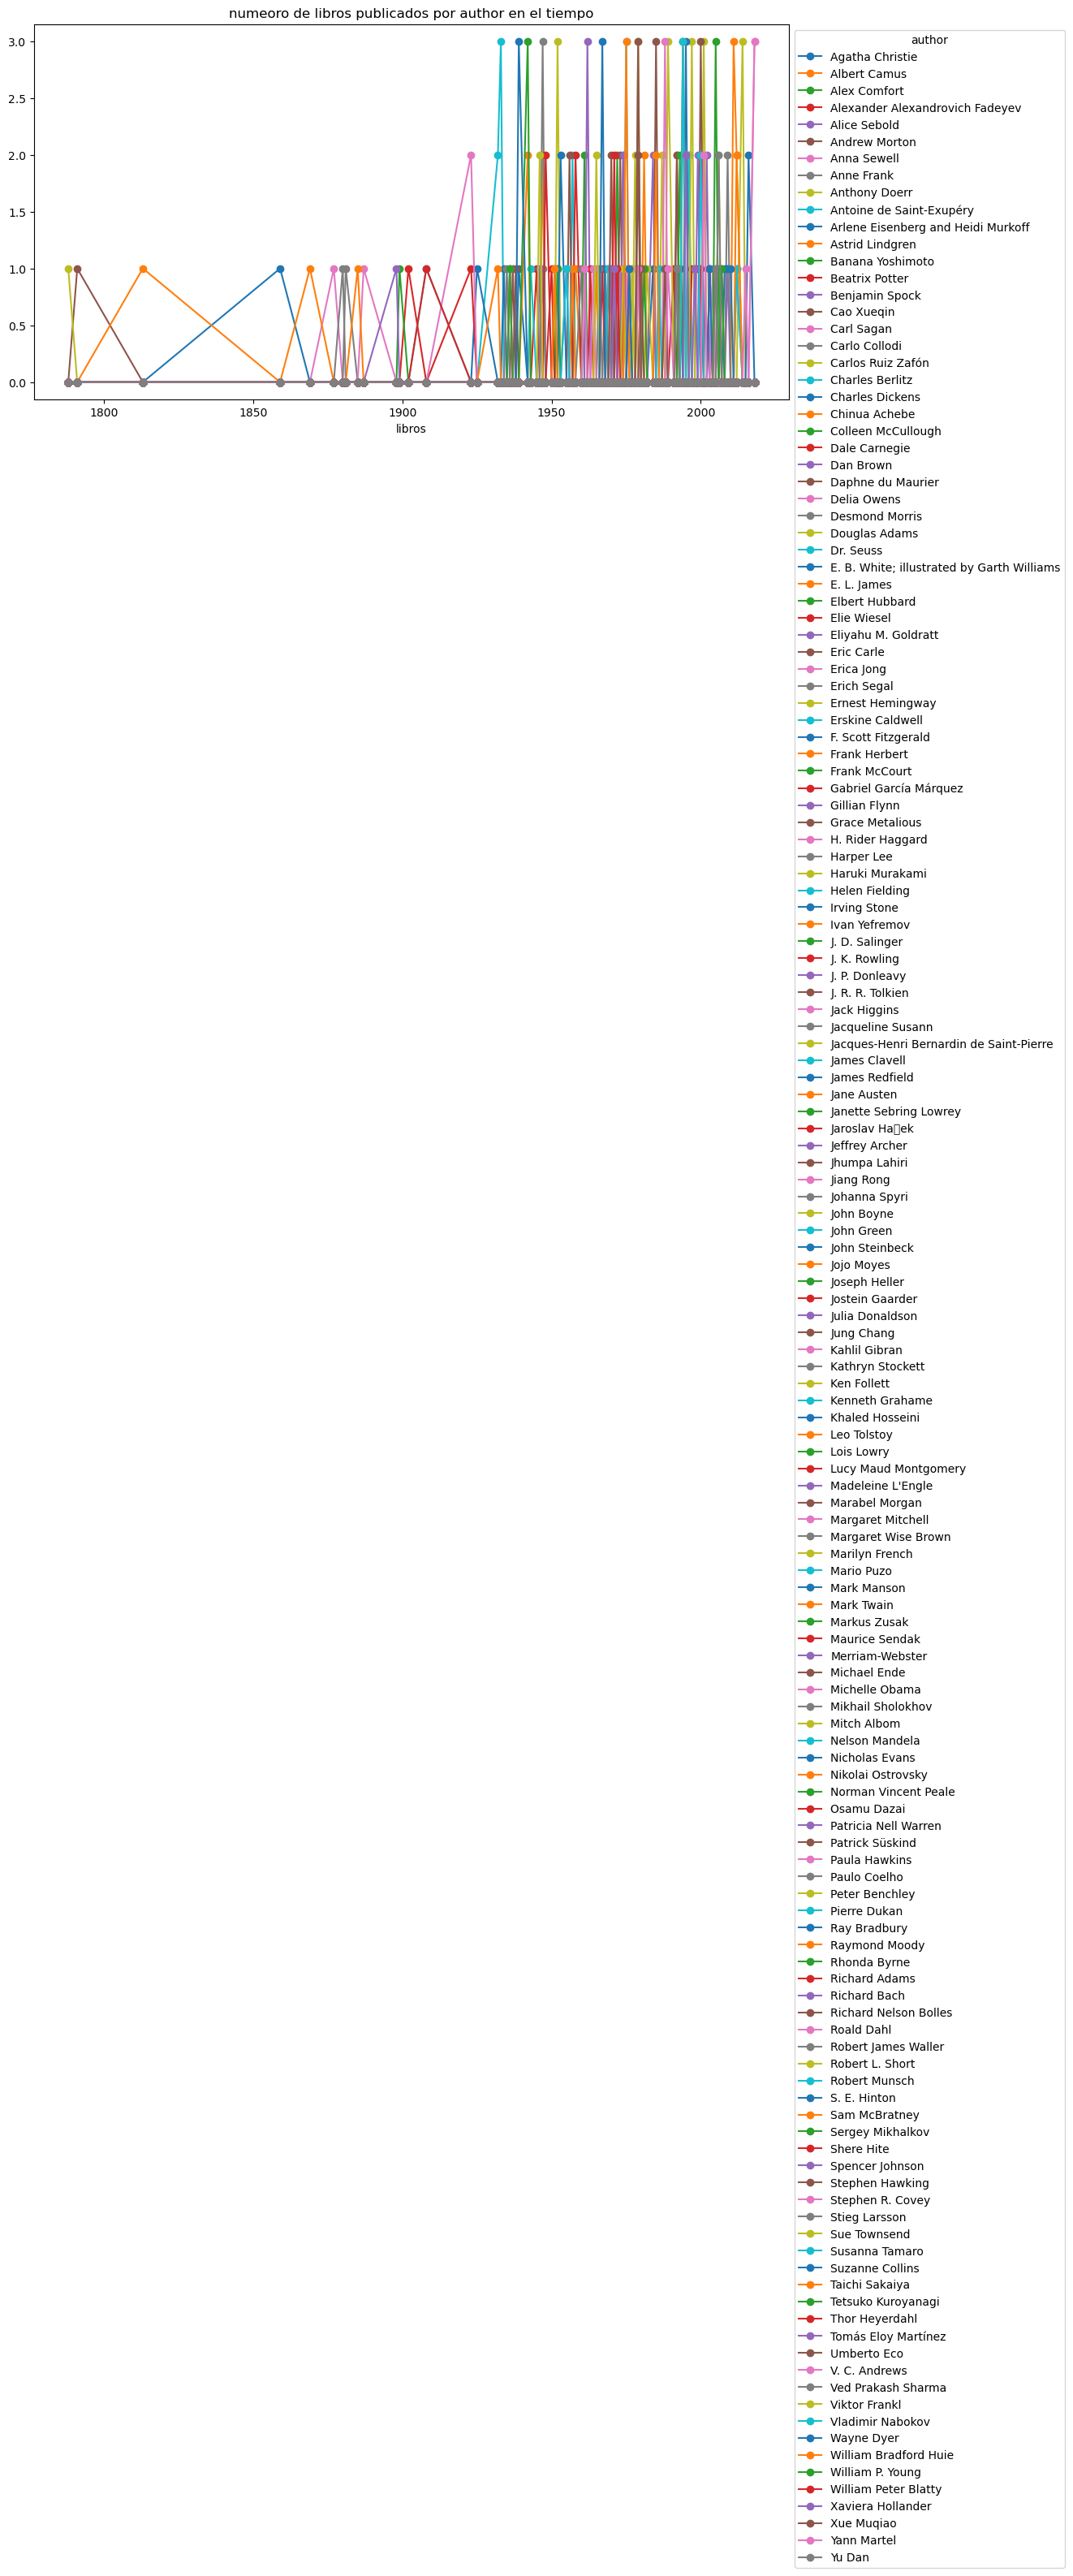

In [19]:
import warnings
warnings.filterwarnings('ignore')

ax = pivot_table.plot(kind='line', marker = 'o', figsize=(12,6))

plt.title('numeoro de libros publicados por author en el tiempo')
plt.xlabel('año')
plt.xlabel('libros')

ax.legend(
title='author',
loc ='upper left',
bbox_to_anchor=(1,1))

plt.show()